## EDA
2019.12.01 ~

### import package

In [2]:
# -*- coding: cp949 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

from IPython.display import Image
%matplotlib inline

In [3]:
# 코드 수행 시간 측정
start = timeit.default_timer()
stop = timeit.default_timer()
# print(stop - start)

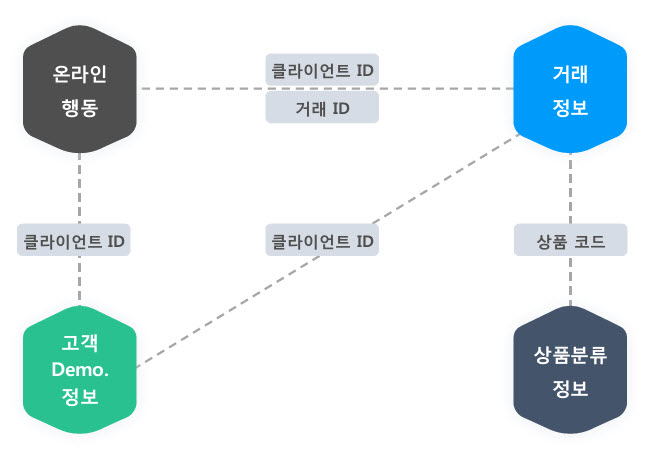

In [4]:
Image("데이터 흐름도.jpg")

In [5]:
online = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv')
transaction = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-02.거래 정보.csv')
client = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-03.고객 Demographic 정보.csv')
products = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-04.상품분류 정보.csv')

C:\Users\huiyeon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
online.shape

(3196362, 14)

In [7]:
online.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,34.0,2663.0,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,34.0,2663.0,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,34.0,2663.0,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,34.0,2663.0,DIRECT,NaN


In [8]:
# Check NA
np.sum(pd.isnull(online))

clnt_id                  0
sess_id                  0
hit_seq                  0
action_type              0
biz_unit                 0
sess_dt                  0
hit_tm                   0
hit_pss_tm               0
trans_id           3139373
sech_kwd           2544724
tot_pag_view_ct       1428
tot_sess_hr_v        57607
trfc_src                 0
dvc_ctg_nm         1782577
dtype: int64

In [9]:
# id별 중복되는 session_id 수
online.groupby(['clnt_id'])['sess_id'].count()

clnt_id
1         10
2        249
3         10
4          2
5          1
        ... 
72425     25
72426      8
72427     26
72428      7
72429      2
Name: sess_id, Length: 72399, dtype: int64

In [10]:
# trfc_src별 집계
online.groupby(['trfc_src']).count()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,dvc_ctg_nm
trfc_src,,,,,,,,,,,,,
DIRECT,1715541,1715541,1715541,1715541,1715541,1715541,1715541,1715541,21227,323858,1715236,1713212,296627
PORTAL_1,40669,40669,40669,40669,40669,40669,40669,40669,459,16583,40668,39946,40669
PORTAL_2,30642,30642,30642,30642,30642,30642,30642,30642,347,7171,30638,30599,30642
PORTAL_3,9792,9792,9792,9792,9792,9792,9792,9792,80,2587,9787,8985,9792
PUSH,523300,523300,523300,523300,523300,523300,523300,523300,6002,71176,523184,522918,160901
WEBSITE,49472,49472,49472,49472,49472,49472,49472,49472,745,10294,49428,40436,48208
unknown,826946,826946,826946,826946,826946,826946,826946,826946,28129,219969,825993,782659,826946


In [11]:
# clnt_id 별 유입경로(trfc_src) 분포 알아보기
online.groupby(['clnt_id','trfc_src'])['trfc_src'].count()

clnt_id  trfc_src
1        unknown      10
2        DIRECT      249
3        unknown      10
4        unknown       2
5        PUSH          1
                    ... 
72425    unknown      25
72426    DIRECT        8
72427    unknown      26
72428    unknown       7
72429    DIRECT        2
Name: trfc_src, Length: 79689, dtype: int64

In [12]:
# sech_kwd 개수
search_kwd = online[online['sech_kwd'].notnull()]['sech_kwd'].value_counts()
search_kwd = pd.DataFrame(search_kwd)

In [13]:
Top200_kwd = search_kwd[search_kwd['sech_kwd']>=200]  # 대부분 식품
Top200_kwd.reset_index(inplace=True)
Top200_kwd.columns = ['sech_kwd', 'cnt']
Top200_kwd

,sech_kwd,cnt
0,우유,8985
1,두부,5210
2,계란,5039
3,생수,4283
4,수박,2694
...,...,...
351,컵밥,203
352,생수500ml삼다수,203
353,제로콜라,202
354,앞다리,201


In [14]:
search_kwd['sech_kwd'].sum() - Top200_kwd['cnt'].sum()
# 포함시키지 못한 검색 키워드 갯수 437345개 -> 사용불가?

437345

In [15]:
# 행동유형 개수
# 0:검색
# 1:제품 목록
# 2:제품 세부정보 보기
# 3:장바구니 제품 추가
# 4:장바구니 제품 삭제
# 5:결제 시도
# 6:구매 완료
# 7:구매 환불
# 8:결제 옵션
online['action_type'].value_counts()  # 5 -> 6으로 가는 갯수 적음
# 750530 - 56249 = 694281

5    750530
2    655266
0    651638
3    596765
1    307998
4    172240
6     56249
7      5676
Name: action_type, dtype: int64

In [16]:
online.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,34.0,2663.0,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,34.0,2663.0,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,34.0,2663.0,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,34.0,2663.0,DIRECT,NaN


In [17]:
online['action_type'].loc[1]

2

In [18]:
# Top200_kwd내에서 구매완료한(action_type=6) 갯수 알아보기
# len(set(Top200_kwd['sech_kwd'])) : 356개로 중복된 값 없음
kwd_type_6 = []  # 빈 list

for i in online['sech_kwd']:
    if i in set(Top200_kwd['sech_kwd']):
        _ = online['action_type'].loc[i]
        kwd_type_6.append(_)
    else:
        continue

kwd_type_6

KeyboardInterrupt: 

In [19]:
# 초 분으로 변환하기
online['hit_pss_min'] = round(online['hit_pss_tm']/60, 3)

# 분 시간으로 변환하기
online['hit_pss_hour'] = round(online['hit_pss_min']/60, 3)

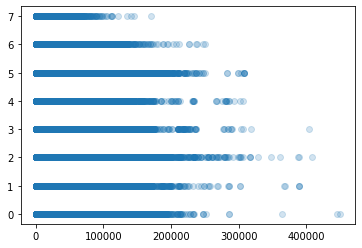

In [20]:
# 조회경과시간(분)과 행동유형 plot
plt.rcParams['agg.path.chunksize'] = 20000
plt.plot('hit_pss_min', 'action_type', data=online,
         linestyle='none', marker='o', alpha=0.2)
plt.show()

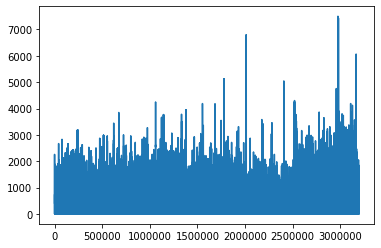

In [21]:
# hit_pss_hour 분포 확인
plt.plot(online['hit_pss_hour'])

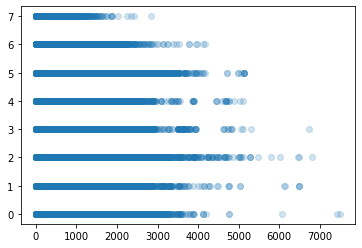

In [22]:
# 조회경과시간(시간)과 행동유형 plot
plt.plot('hit_pss_hour', 'action_type', data=online,
         linestyle='none', marker='o', alpha=0.2)
plt.show()

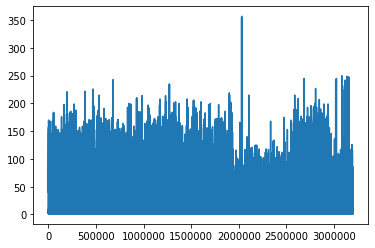

In [23]:
# hits 수 분포 살펴보기
plt.plot(online['hit_seq'])

In [24]:
# Hits 수와 action_type 살펴보기
online.groupby([ 'action_type'])['hit_seq'].mean()

action_type
0    14.807322
1    18.511809
2    13.108316
3    16.605632
4    22.806148
5    24.924777
6    21.518996
7    11.840204
Name: hit_seq, dtype: float64

### 논의해야 할 사항
1. 비식별고객은 제외하고 분석 할건지?
2. 검색어 sech_kwd 특수문자 제거하고 할건지?
3. 구매시간대 별 구매추천?
4. 고객 클러스터링 어떤 방식으로 진행할지?

In [25]:
# clnt_id 별 유입경로(trfc_src) 분포 알아보기
online.groupby(['clnt_id','trfc_src'])['trfc_src'].count()

clnt_id  trfc_src
1        unknown      10
2        DIRECT      249
3        unknown      10
4        unknown       2
5        PUSH          1
                    ... 
72425    unknown      25
72426    DIRECT        8
72427    unknown      26
72428    unknown       7
72429    DIRECT        2
Name: trfc_src, Length: 79689, dtype: int64

In [26]:
client.head()

,clnt_id,clnt_gender,clnt_age
0,1,unknown,unknown
1,2,F,30
2,3,unknown,unknown
3,4,unknown,unknown
4,5,unknown,unknown


In [27]:
# online과 client 병합
df1 = pd.merge(client, online, on='clnt_id')
df1.head()

,clnt_id,clnt_gender,clnt_age,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,hit_pss_min,hit_pss_hour
0,1,unknown,unknown,2,6,0,A01,20190922,14:12,178832,NaN,노스페이스초등,45.0,424.0,unknown,mobile_app,2980.533,49.676
1,1,unknown,unknown,1,3,0,A01,20190911,16:15,36140,NaN,과일바구니,14.0,124.0,unknown,mobile_app,602.333,10.039
2,1,unknown,unknown,2,3,0,A01,20190922,14:10,70025,NaN,초등남아옷,45.0,424.0,unknown,mobile_app,1167.083,19.451
3,1,unknown,unknown,2,1,0,A01,20190922,14:09,41584,NaN,초등가을잠바,45.0,424.0,unknown,mobile_app,693.067,11.551
4,1,unknown,unknown,1,1,0,A01,20190911,16:14,11880,NaN,과일선물세트,14.0,124.0,unknown,mobile_app,198.000,3.300


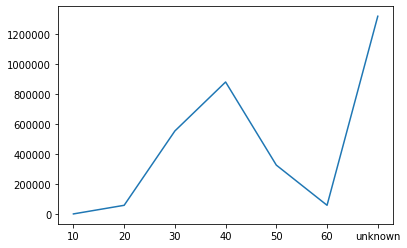

In [28]:
# 연령대별 세션id개수 살펴보기
plt.plot(df1.groupby(['clnt_age'])['sess_id'].count())

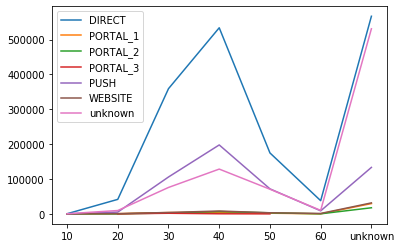

In [29]:
# 연령대별로 유입채널별, 세션id 개수 살펴보기
look1 = df1.pivot_table('sess_id', index='clnt_age', columns='trfc_src',
                        aggfunc='count')
plt.plot(look1)
plt.legend(look1.columns)

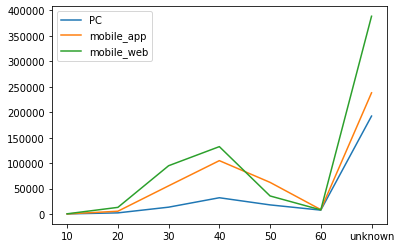

In [30]:
# 연령대별로 기기유형별 세션수 살펴보기
look2 = df1.pivot_table('sess_id', index='clnt_age', columns='dvc_ctg_nm',
                        aggfunc='count')
plt.plot(look2)
plt.legend(look2.columns)
# mobile_web > app > pc

In [31]:
online['biz_unit'].value_counts()

A03    2331437
A02     668093
A01     196832
Name: biz_unit, dtype: int64

In [32]:
online['hit_seq'].value_counts()

1      367149
2      246633
3      198580
4      167819
5      143873
        ...  
282         1
281         1
280         1
279         1
357         1
Name: hit_seq, Length: 357, dtype: int64

In [33]:
# 조회 일련번호와 구매관계 살펴보기
online['trans_id'].isnull().value_counts()  
# 결측값 3139373, 값 보유 56989

# 구매이력 존재 = buyer 아니면 non_buyer
buyer = online[online['trans_id'].isnull()==False]
non_buyer = online[online['trans_id'].isnull()==True]

구매이력 존재하면 1, 0으로 레이블링 오류
for i in range(len(online)):
    if online['trans_id'][i]==np.nan:
        online['buy_ex'] = 0
    else :
        online['buy_ex'] = 1

In [34]:
buyer.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,hit_pss_min,hit_pss_hour
105,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,56.0,1303.0,PUSH,mobile_web,20204.950,336.749
206,24276,17,31,6,A03,20190806,16:52,983154,69420.0,NaN,26.0,998.0,DIRECT,NaN,16385.900,273.098
246,24276,1,87,6,A03,20190702,21:42,8131793,40228.0,NaN,99.0,8132.0,PUSH,NaN,135529.883,2258.831
708,47444,27,40,6,A03,20190930,19:56,2612017,112652.0,NaN,70.0,2612.0,DIRECT,PC,43533.617,725.560
710,47444,12,27,6,A03,20190818,12:05,1146060,78445.0,NaN,47.0,1146.0,DIRECT,PC,19101.000,318.350


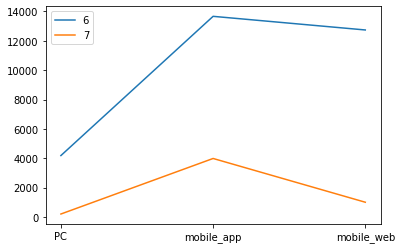

In [35]:
# 구매한 사람과 구매하지 않은 사람들의 조회이력 살펴보기
look3 = buyer.pivot_table('clnt_id', index='dvc_ctg_nm', columns='action_type',
                        aggfunc='count')
plt.plot(look3)
plt.legend(look3.columns)

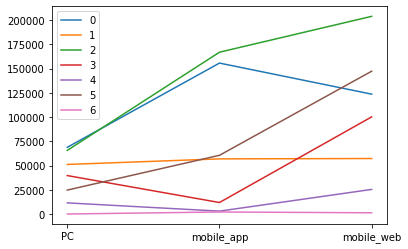

In [36]:
look4 = non_buyer.pivot_table('clnt_id', index='dvc_ctg_nm', columns='action_type',
                            aggfunc='count')
plt.plot(look4)
plt.legend(look4.columns)
# 2 -> 3번으로 유도해야 구매건수 높아질 것으로 기대됨.

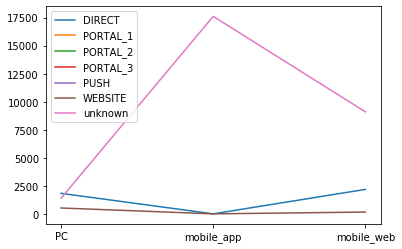

In [37]:
# buyer 유입채널 살펴보기
look5 = buyer.pivot_table('clnt_id', index='dvc_ctg_nm', columns='trfc_src',
                        aggfunc='count')
plt.plot(look5)
plt.legend(look5.columns)
# 대부분의 고객이 mobile_app을 로그인 하지 않은 채로 유입?

#### 온라인행동정보(online) + 거래 정보(transaction) merge

In [42]:
online_trans = pd.merge(online, transaction, on=['clnt_id', 'trans_id'])
online_trans.set_index(['clnt_id','trans_id'], inplace=True)
online_trans.sort_values(['clnt_id', 'trans_id', 'trans_seq'], inplace=True)
online_trans.head(10)

sess_id  hit_seq  action_type biz_unit_x   sess_dt hit_tm  \
clnt_id trans_id                                                              
2       62037.0         1       37            6        A03  20190728  23:47   
        64691.0         8       68            6        A03  20190731  21:25   
        64691.0         8       68            6        A03  20190731  21:25   
        64691.0         8       68            6        A03  20190731  21:25   
        64691.0         8       68            6        A03  20190731  21:25   
        64691.0         8       68            6        A03  20190731  21:25   
        65505.0        10       16            6        A03  20190801  22:00   
        88495.0        19       17            6        A03  20190830  22:00   
        88495.0        19       17            6        A03  20190830  22:00   
        88495.0        19       17            6        A03  20190830  22:00   

                  hit_pss_tm sech_kwd  tot_pag_view_ct  tot_sess_hr_v  ...  \
clnt_id trans_id                                                       ...   
2       62037.0       791905      NaN             55.0          872.0  ...   
        64691.0      3251794      NaN             85.0         3256.0  ...   
        64691.0      3251794      NaN             85.0         3256.0  ...   
        64691.0      3251794      NaN             85.0         3256.0  ...   
        64691.0      3251794      NaN             85.0         3256.0  ...   
        64691.0      3251794      NaN             85.0         3256.0  ...   
        65505.0       306944      NaN             23.0          353.0  ...   
        88495.0      2227390      NaN             29.0         2253.0  ...   
        88495.0      2227390      NaN             29.0         2253.0  ...   
        88495.0      2227390      NaN             29.0         2253.0  ...   

                 dvc_ctg_nm hit_pss_min  hit_pss_hour  trans_seq  biz_unit_y  \
clnt_id trans_id                                                               
2       62037.0         NaN   13198.417       219.974          1         A03   
        64691.0         NaN   54196.567       903.276          1         A03   
        64691.0         NaN   54196.567       903.276          2         A03   
        64691.0         NaN   54196.567       903.276          3         A03   
        64691.0         NaN   54196.567       903.276          4         A03   
        64691.0         NaN   54196.567       903.276          5         A03   
        65505.0         NaN    5115.733        85.262          1         A03   
        88495.0         NaN   37123.167       618.719          1         A03   
        88495.0         NaN   37123.167       618.719          2         A03   
        88495.0         NaN   37123.167       618.719          3         A03   

                  pd_c     de_dt  de_tm buy_am  buy_ct  
clnt_id trans_id                                        
2       62037.0   0092  20190729  23:47  36000      20  
        64691.0   0186  20190731  21:25   3790       1  
        64691.0   0151  20190731  21:25   3990       1  
        64691.0   0351  20190731  21:25   4690       1  
        64691.0   0189  20190731  21:25   4290       1  
        64691.0   0092  20190731  21:25   1800       1  
        65505.0   0092  20190801  22:00   9000       5  
        88495.0   1395  20190830  22:00   3590       1  
        88495.0   1395  20190830  22:00   2850       1  
        88495.0   1395  20190830  22:00   5700       2  

[10 rows x 21 columns]

In [45]:
online_trans.columns

Index(['sess_id', 'hit_seq', 'action_type', 'biz_unit_x', 'sess_dt', 'hit_tm',
       'hit_pss_tm', 'sech_kwd', 'tot_pag_view_ct', 'tot_sess_hr_v',
       'trfc_src', 'dvc_ctg_nm', 'hit_pss_min', 'hit_pss_hour', 'trans_seq',
       'biz_unit_y', 'pd_c', 'de_dt', 'de_tm', 'buy_am', 'buy_ct'],
      dtype='object')

In [65]:
online_trans.drop(['biz_unit_y'], axis=1, inplace=True)
online_trans.rename(columns = {'biz_unit_x' : 'biz_unit'},
                   inplace=True)

In [66]:
# biz_unit : 온라인 및 오프라인 이용처를 구분하는 단위코드
online_trans['biz_unit'].value_counts()

A03    116173
A02      9776
A01      1409
Name: biz_unit, dtype: int64

In [68]:
# trfc_src별, biz_unit의 sess_id 개수
online_trans.pivot_table('sess_id', index='trfc_src', columns='biz_unit',
                         aggfunc='count')
# 대부분이 A03, unknown은 거의 A02

biz_unit,A01,A02,A03
trfc_src,,,
DIRECT,114.0,NaN,84805.0
PORTAL_1,25.0,NaN,986.0
PORTAL_2,1.0,NaN,1144.0
PORTAL_3,NaN,NaN,236.0
PUSH,NaN,NaN,27954.0
WEBSITE,23.0,NaN,1048.0
unknown,1246.0,9776.0,NaN


In [94]:
# 구매일자 별 구매금액총액 살펴보기
# 20190827, 20190827 ; 극도로 큰 값, 제외하고 사용해야할듯
pd.set_option('display.max_rows', 100)
online_trans.pivot_table('buy_am', index='de_dt',aggfunc='sum')

,buy_am
de_dt,
20190701,15367820
20190702,20021012
20190703,19287291
20190704,27644488
20190705,18549168
20190706,16110806
20190707,38831736
20190708,22607289
20190709,15625265
